In [1]:
import time
import matplotlib.pyplot as plt

# Environments
from environments.ACOEnvironment import ACOEnvironment
from environments.Environment import Environment

# Algorithms
from algorithms.AntColonyOptimization import AntColonyOptimization # ACO
from algorithms.ADPE_AntColonyOptimization import ADPE_AntColonyOptimization # ADPE ACO
from algorithms.ParticleSwarmOptimization import ParticleSwarmOptimization # PSO
from algorithms.FireflyAlgorithm import FireflyAlgorithm # AFFA

# Helper classes
from helpers.PathSpecification import PathSpecification
from helpers.Coordinate import Coordinate

# Creating an environment

We create the environment that will be used by all the nature-inspired algorithms.

We start by declaring the parameters:

In [6]:
# Please keep your parameters for the environment easily changeable here

# Environment parameters
width = 40
height = 40
start_pos = Coordinate(2, 2)
end_pos = Coordinate(38, 38)
obstacles = [(2.5, 0.2), (1.5, 0.1)] # We generate an obstacle of radius 2 with frequency 11% and obstacles of radius 1 with frequency 1.8%
obstacle_distance = 1

# Algorithm parameters
step_size = 1
trail = 1.0
convergence_iter = 3500

Next, we create the environment and visualize it.

Finished preparing the environment


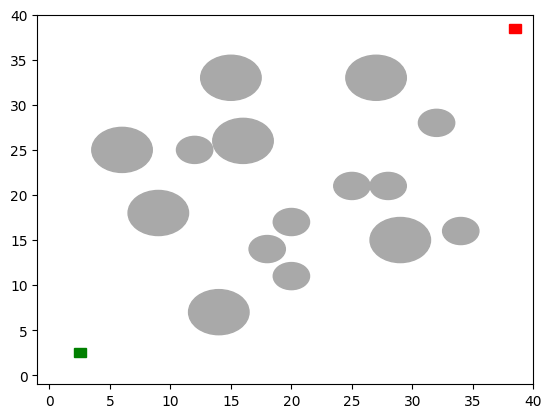

In [3]:
# Use the environment variables already declared above and add the definitions for pso
# eventually consider using the same environment for aco as for pso?
environment = Environment.create_environment(width, height, obstacles, start_pos=start_pos, end_pos=end_pos)
spec = PathSpecification(start_pos, end_pos)

# Show the environment in matplotlib
environment.visualize_environment()

# Ant Colony Optimization

First, we initialize the variables we will be using for ACO.

In [4]:
# Please keep your parameters for the ACO easily changeable here
aco_agents_per_generation = 30
aco_no_generations = 50
aco_q = 500
aco_evaporation = 0.5
aco_no_change_iter = 30

Next, we build the environment and other necessary objects. We also print how the environment looks like.

In [5]:
# Construct the optimization objects
# environment = ACOEnvironment.create_environment(width, height, obstacles, start_pos=start_pos, end_pos=end_pos)
aco_environment = ACOEnvironment.create_from_environment(environment)
aco = AntColonyOptimization(aco_environment, aco_agents_per_generation, aco_no_generations, aco_q, aco_evaporation, convergence_iter, aco_no_change_iter, trail, step_size, num_processes=6)

Next, we run the ACO algorithm and print the results.

Started ACO
Generation 0
Routes found so far: 30
Best route's length: 250


Generation 1
Routes found so far: 30
Best route's length: 250


Generation 2
Routes found so far: 30
Best route's length: 217


Generation 3
Routes found so far: 30
Best route's length: 217


Generation 4
Routes found so far: 30
Best route's length: 217


Generation 5
Routes found so far: 30
Best route's length: 217


Generation 6
Routes found so far: 30
Best route's length: 217


Generation 7
Routes found so far: 30
Best route's length: 217


Generation 8
Routes found so far: 30
Best route's length: 217


Generation 9
Routes found so far: 30
Best route's length: 217


Generation 10
Routes found so far: 30
Best route's length: 169


Generation 11
Routes found so far: 30
Best route's length: 169


Generation 12
Routes found so far: 30
Best route's length: 169


Generation 13
Routes found so far: 30
Best route's length: 169


Generation 14
Routes found so far: 30
Best route's length: 169


Generation 15
Routes fo

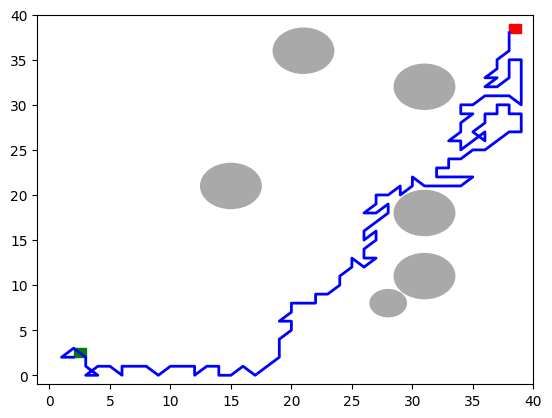

In [6]:
# Save starting time
start_time = int(round(time.time() * 1000))

print("Started ACO")

# Run optimization
shortest_route, checkpoints = aco.find_shortest_route(spec, print_progress=True)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

# Print route path
aco_environment.visualize_environment(shortest_route)

#### Speed of convergence

Finished preparing the board
Generation 0
Routes found so far: 20
Best route's length: 322


Generation 1
Routes found so far: 20
Best route's length: 316


Generation 2
Routes found so far: 20
Best route's length: 238


Generation 3
Routes found so far: 20
Best route's length: 238


Generation 4
Routes found so far: 20
Best route's length: 212


Generation 5
Routes found so far: 20
Best route's length: 212


Generation 6
Routes found so far: 20
Best route's length: 212


Generation 7
Routes found so far: 20
Best route's length: 120


Generation 8
Routes found so far: 20
Best route's length: 120


Generation 9
Routes found so far: 20
Best route's length: 120


Generation 10
Routes found so far: 20
Best route's length: 120


Generation 11
Routes found so far: 20
Best route's length: 120


Generation 12
Routes found so far: 20
Best route's length: 120


Generation 13
Routes found so far: 20
Best route's length: 120


Generation 14
Routes found so far: 20
Best route's length: 120


Genera

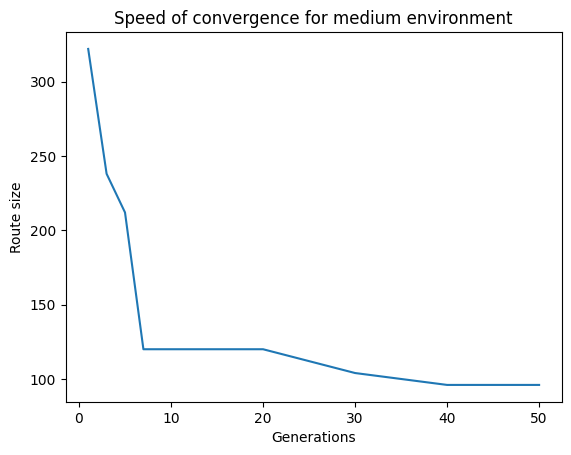

In [8]:
aco_agents_per_generation = 20
aco_no_generations = 50
aco_q = 200
aco_evaporation = 0.2
new_convergence_iter = 10000
aco_no_change_iter = 50
aco_sigma_elite = 50

# Create environment
aco_environment.reset()

# Start ACO Algorithm
aco = AntColonyOptimization(aco_environment, aco_agents_per_generation, aco_no_generations, aco_q, aco_evaporation, new_convergence_iter, aco_no_change_iter, trail, aco_sigma_elite, num_processes=6)
shortest_route, checkpoints = aco.find_shortest_route(spec)

plt.plot([1, 3, 5, 7, 10, 20, 30, 40, 50], checkpoints)
plt.xlabel("Generations")
plt.ylabel("Route size")
plt.title("Speed of convergence for medium environment")
plt.show()

# Adaptive Dynamic Probabilistic Ant Colony Optimization

We start by declaring an additional parameter for ADPE ACO:

In [7]:
aco_sigma_elite = 50

We build the environment and other necessary objects. We also print how the environment looks like.

In [8]:
# Construct the optimization objects
# environment = ACOEnvironment.create_environment(width, height, obstacles, start_pos=start_pos, end_pos=end_pos)
aco_environment = ACOEnvironment.create_from_environment(environment)
adpe_aco = ADPE_AntColonyOptimization(aco_environment, aco_agents_per_generation, aco_no_generations, aco_q, aco_evaporation, convergence_iter, aco_no_change_iter, trail, aco_sigma_elite, step_size, num_processes=6)

Next, we run the ADPE ACO algorithm and print the results.

Started ACO
Generation 0
Routes found so far: 30
Best route's length: 250


Generation 1
Routes found so far: 30
Best route's length: 250


Generation 2
Routes found so far: 30
Best route's length: 217


Generation 3
Routes found so far: 30
Best route's length: 217


Generation 4
Routes found so far: 30
Best route's length: 184


Generation 5
Routes found so far: 30
Best route's length: 184


Generation 6
Routes found so far: 30
Best route's length: 184


Generation 7
Routes found so far: 30
Best route's length: 184


Generation 8
Routes found so far: 30
Best route's length: 184


Generation 9
Routes found so far: 30
Best route's length: 184


Generation 10
Routes found so far: 30
Best route's length: 184


Generation 11
Routes found so far: 30
Best route's length: 184


Generation 12
Routes found so far: 30
Best route's length: 184


Generation 13
Routes found so far: 30
Best route's length: 184


Generation 14
Routes found so far: 30
Best route's length: 184


Generation 15
Routes fo

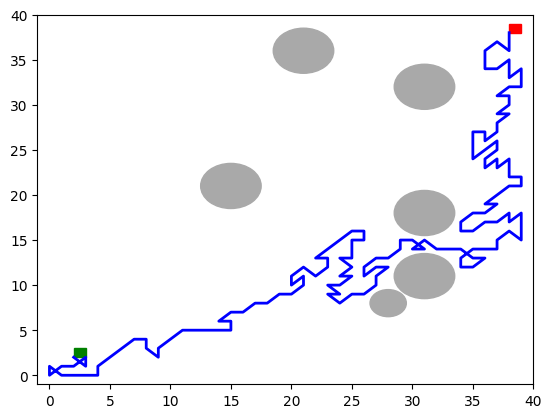

In [9]:
# Save starting time
start_time = int(round(time.time() * 1000))

print("Started ACO")

# Run optimization
shortest_route, checkpoints = adpe_aco.find_shortest_route(spec, print_progress=True)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

# Print route path
aco_environment.visualize_environment(shortest_route)

# Particle Swarm Optimization

We declare the necessary parameters for the Particle Swarm Optimization algorithm.

In [13]:
# Parameters specifically for PSO
pso_num_iterations = 500 # to let Lévy flights get out of local optima eventually
pso_inertia_weight = 1.0 # currently irrelevant as adapted from acceleration coefficients, but given for completeness
pso_num_particles = 100 # the number of particles generated initially to run pso on

Next, we run the Particle Swarm Optimization algorithm and print the results.

Started PSO
2.7100777605962794, 2.7096944389760638
3.418394077334137, 3.4500311686515945
5.0204106767599885, 4.895934317172556
6.596330440600907, 6.507426512132946
8.197787275565682, 8.215421711675702
9.871771526360815, 9.920336898629795
11.53004337007825, 11.580186090857469
13.162793854071289, 13.308742388884552
14.719365108719755, 15.012979905648438
16.341456154813123, 16.675376771407507
17.885008385036965, 18.371846774341204
19.474616683777132, 19.938953484544694
21.15274823551119, 21.637178205097317
22.66023146080684, 23.201776812824615
24.312301874916425, 24.850554168511557
25.965074046088983, 26.492555161357455
27.574696400347193, 28.12562404417977
29.154233679423502, 29.70869376651698
30.797805993729014, 31.358544852707993
32.4159084622272, 32.935701571116375
34.04833683219515, 34.58720378668786
35.7258884485775, 36.26349924165115
37.41048823201857, 37.938111941705436
37.742050862953306, 38.25665042093463
Time taken: 0.084
Route size: 26


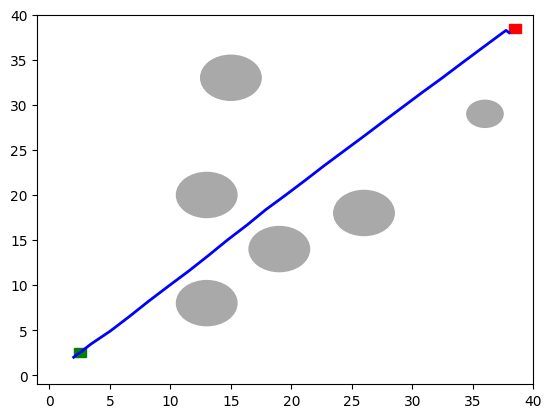

In [14]:
# initialize pso
pso = ParticleSwarmOptimization(environment, spec, pso_num_particles, convergence_iter, trail, step_size, pso_inertia_weight, pso_num_iterations)

# Save starting time
start_time = int(round(time.time() * 1000))

print("Started PSO")

# run the pso
shortest_route = pso.run()

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size; not really relevant for pso as it adds global bests and may get stuck for a bit
# normally measured in path length or time taken better
print("Route size: " + str(shortest_route.size()))

# Print route path
environment.visualize_environment(shortest_route)

# Firefly algorithm

We declare the necessary parameters for the Particle Swarm Optimization algorithm.

In [4]:
fa_population_size = 100
alpha_init = 1
alpha_final = 0.01
beta = 1
gamma_init = 0.1
gamma_final = 5
fa_max_iter = 100

Next, we run the Firefly algorithm (AFFA) and print the results.

Started FA
-50.799855390371356
-50.749186678227005
-50.703794397036596
-47.81715976043562
-47.773094862215046
-47.75102060297019
-47.69658037051507
-47.64877685619173
-47.60577088435261
-46.377537117409275
-46.268550329236106
-44.428042104799346
-44.275717998078974
-44.169432673672425
-41.78853074652939
-41.75764406760165
-41.73125812536761
-41.70673281327175
-41.697255757446946
-38.98269075038532
-38.969735014494916
-38.922711378537414
-38.901965089455416
-38.89577213337092
-38.837206305601654
-38.79626335136383
-35.50818844756097
-35.426589109129324
-32.90501321828605
-32.89302794521282
-32.85173174902368
-32.846632780860084
-32.78427313235721
-32.29896269002029
-32.256423083020955
-32.1983019867648
-32.1910655123327
-32.17025160812999
-32.1067483524126
-29.457483401136702
-29.449576155888607
-29.4483144130369
-29.42586224095503
-29.38389107291501
-29.371456228303664
-28.455557104268227
-28.45276070483487
-28.399141873593287
-26.073895043222763
-25.721439570402982
-25.559761044456238

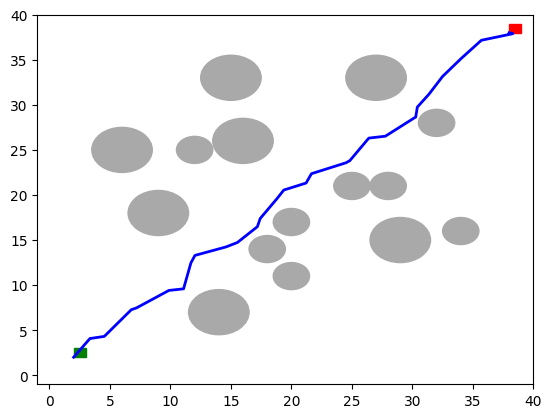

In [7]:
# initialize pso
fa = FireflyAlgorithm(environment, spec, fa_population_size, alpha_init, alpha_final, gamma_init, gamma_final, beta, fa_max_iter, obstacle_distance)

# Save starting time
start_time = int(round(time.time() * 1000))

print("Started FA")

# run fa
shortest_route = fa.run()

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size; not really relevant for pso as it adds global bests and may get stuck for a bit
# normally measured in path length or time taken better
print("Route size: " + str(shortest_route.size()))

# Print route path
environment.visualize_environment(shortest_route)